# Getting Rich With Python In One Afternoon (Hopefully!)
### Parnian Kassraie - Fall 2017

In [1]:
import numpy as np
import csv
from numpy._distributor_init import NUMPY_MKL
from matplotlib import pyplot as plt
from sklearn import linear_model
import os
import pandas as pd
import seaborn as sns

## 1. Data acquisition
We have next to no experience.

Our only tool is python and any format of publicly available data on the web.

But we have faith! Let's see what can we do with that.

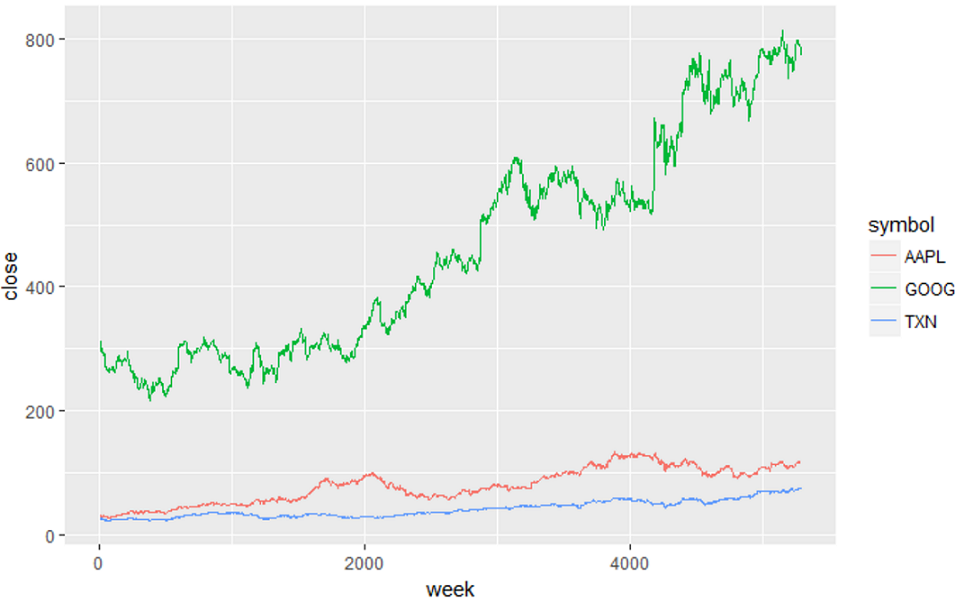

### 1.1 Candidate sources
* Google Search Query Trends
    + Can we predict stock by tracing corresponding search terms?
    + What makes a search term "related" to stock? Can This data be trusted?
    + How fast are the stock prices affected?
    
|       NYSE       |     NADSAQ     | Radiohead  |  Mass Murder   |     US Goverment Debt    |
|------------------|----------------|------------|----------------|--------------------------|
|   Stock Market   |  Stock Market  | Rock Band  |  News Headline | Relevant Political Issue |


In [26]:
Trends = pd.read_csv('multiTimeline.csv')
Trends.head()

,Week,Radiohead,New York Stock Exchange,National debt of the United States,NASDAQ,Mass Murder
0,12/2/2012,9,11,12,11,1
1,12/9/2012,10,11,8,11,12
2,12/16/2012,9,19,6,11,24
3,12/23/2012,9,18,6,8,5
4,12/30/2012,9,19,13,11,3


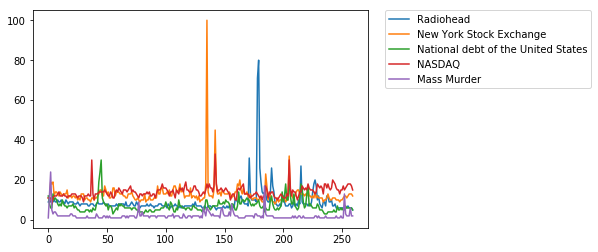

In [33]:
plt.plot(Trends.index, Trends["Radiohead"], label = "Radiohead")
plt.plot(Trends.index, Trends["New York Stock Exchange"], label ="New York Stock Exchange" )
plt.plot(Trends.index, Trends["National debt of the United States"], label ="National debt of the United States" )
plt.plot(Trends.index, Trends["NASDAQ"], label = "NASDAQ")
plt.plot(Trends.index, Trends["Mass Murder"], label = "Mass Murder")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Now I wanna know whether these vectors are related.

In such cases, we should use correlation tests. I don't know how to do that with python, so I'm just gonna search that.

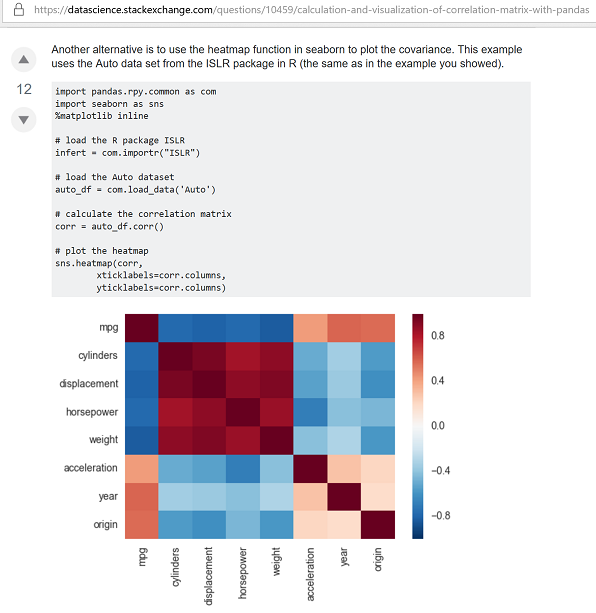

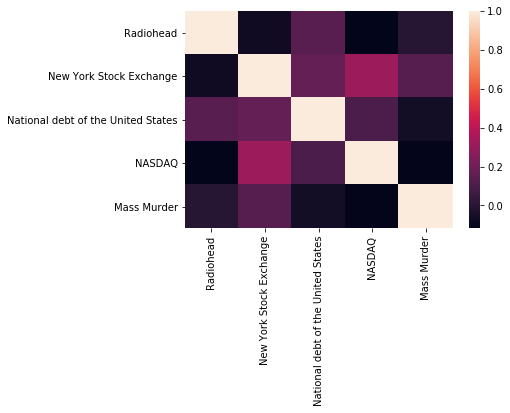

In [43]:
corr = Trends.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

We still could try to compute the correlation of search interest with price values.

Try that at home!

* Text Mining News Broadcasting websites

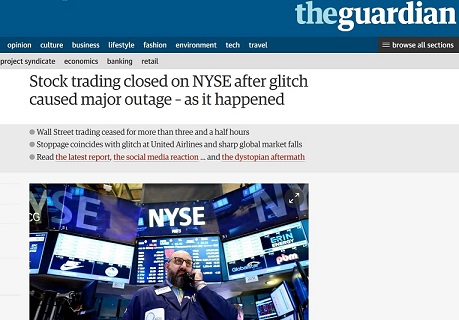

* History of Every Share Bought and Sold on the Stock Market by All Traders
    + A GIGANTIC Dataset!
    + Uncertain Cause & Effect
    + High Dimensional Data, Needs Special Care (Dimension reduction, more complex models)
    
    
* Archive of All Price Fluctuations
    + Seems alright.

### 1.2 Getting to Know our Data

Probably Covered already.

## 2. Prediction 

### 2.1 Fitting Polynomials

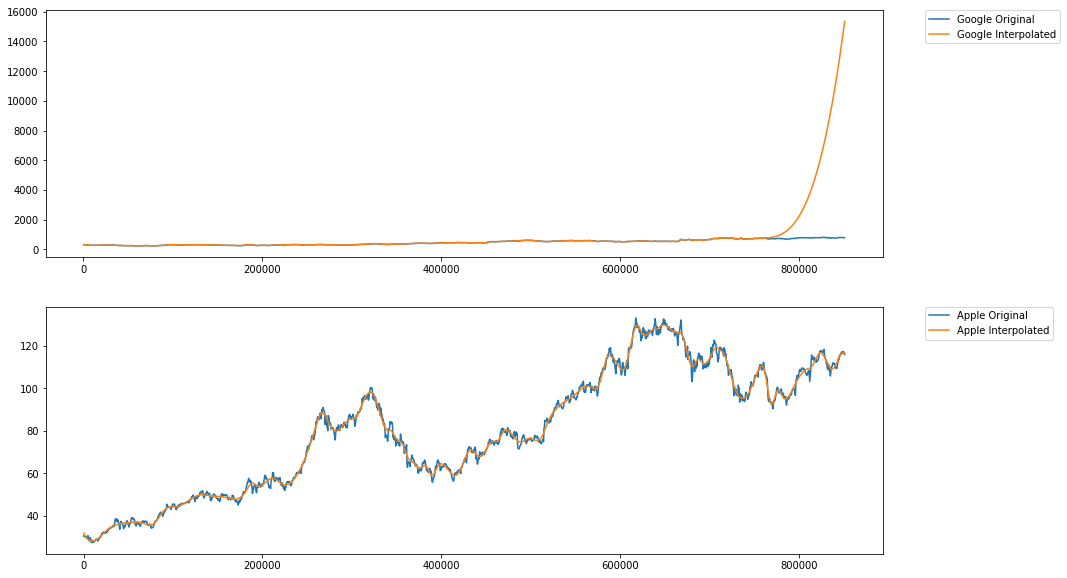

In [2]:
from scipy import interpolate
df = pd.read_csv('prices.csv')
Goog = df[df.symbol == "GOOG"]
GTrain = Goog[0:int(round(len(Goog.index)*0.9))]
Apple = df[df.symbol == "AAPL"]
tck = interpolate.splrep(GTrain.index, GTrain.close, s=1e5)
Gyinterp = interpolate.splev(Goog.index, tck, der=0)
Ayinterp = interpolate.UnivariateSpline(Apple.index, Apple.close, s=5e3)(Apple.index)
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(2, 1, 1)
plt.plot(Goog.index, Goog.close,label = 'Google Original')
plt.plot(Goog.index, Gyinterp, label = 'Google Interpolated')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.add_subplot(2, 1, 2)
plt.plot(Apple.index, Apple.close,label = 'Apple Original')
plt.plot(Apple.index, Ayinterp, label = 'Apple Interpolated')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

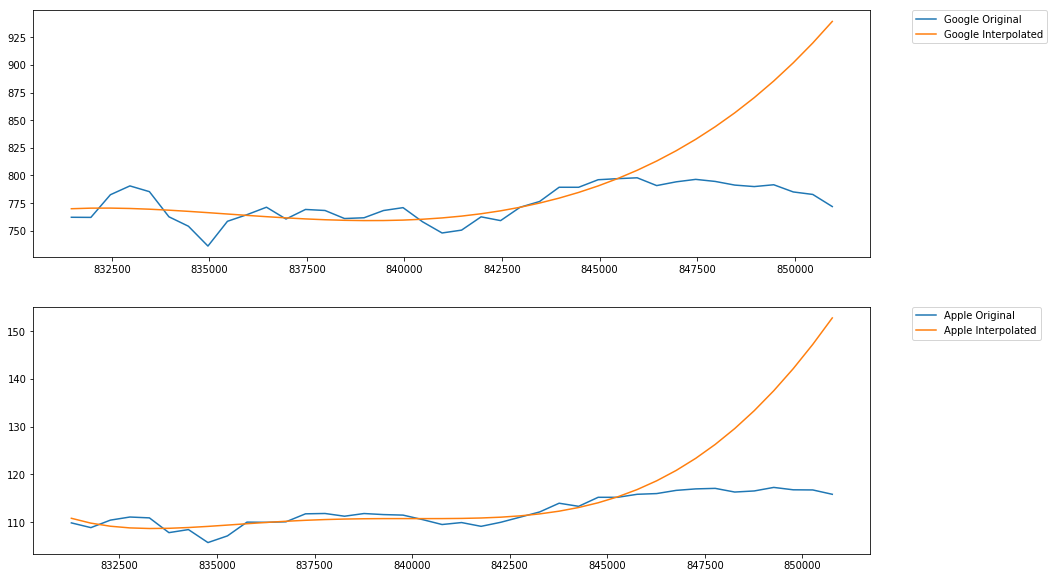

In [7]:
GTrain = Goog[len(Goog.index)-40:len(Goog.index)-10]
ATrain = Apple[len(Apple.index)-40:len(Apple.index)-10]
Gz = np.polyfit(GTrain.index,GTrain.close,5); pG = np.poly1d(Gz)
Az = np.polyfit(ATrain.index,ATrain.close,5); pA = np.poly1d(Az)

fig = plt.figure(figsize=(15, 10))
fig.add_subplot(2, 1, 1)
plt.plot(Goog.index[len(Goog.index)-40:], Goog.close[len(Goog.index)-40:],label = 'Google Original')
plt.plot(Goog.index[len(Goog.index)-40:], pG(Goog.index[len(Goog.index)-40:]), label = 'Google Interpolated')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.add_subplot(2, 1, 2)
plt.plot(Apple.index[len(Apple.index)-40:], Apple.close[len(Apple.index)-40:],label = 'Apple Original')
plt.plot(Apple.index[len(Apple.index)-40:], pA(Apple.index[len(Apple.index)-40:]), label = 'Apple Interpolated')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### 2.2 Linear Models

C:\Program Files\Python35\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Program Files\Python35\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


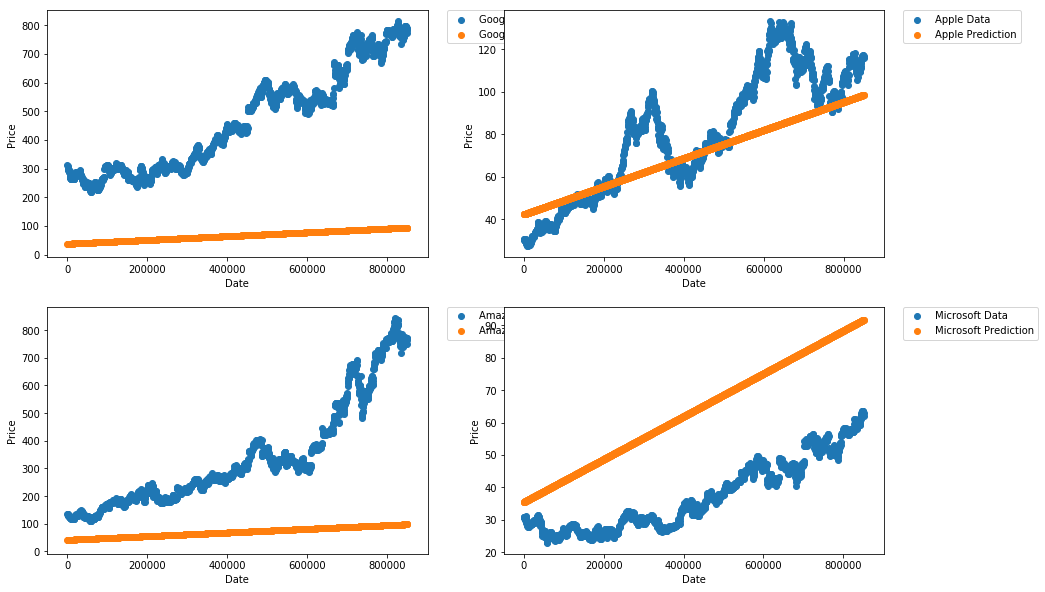

In [27]:
df = pd.read_csv('prices.csv')
df = df.sample(frac=1)
df['symbol'] = df['symbol'].astype('category')
df['int_symbol'] = df['symbol'].cat.codes
split = int(round(len(df.index)*0.8))
train = df[0:split]; test = df[split+1:]
train_price = train["close"]; train_feat = np.column_stack((np.asarray(train['int_symbol']),np.asarray(train.index)))
test_price = test["close"]; test_feat = np.column_stack((np.asarray(test['int_symbol']),np.asarray(test.index)))
linear_mod = linear_model.LinearRegression()
linear_mod.fit(train_feat, train_price)
train['lin_reg'] = linear_mod.predict(train_feat)
test['lin_reg'] = linear_mod.predict(test_feat)
result = pd.concat([train,test])
Goog = result[result.symbol == "GOOG"]
Apple = result[result.symbol == "AAPL"]
Amaz = result[result.symbol == "AMZN"]
Micro = result[result.symbol == "MSFT"]
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(2, 2, 1)
plt.scatter(Goog.index, Goog["close"], label= 'Google Data')
plt.scatter(Goog.index, Goog["lin_reg"], label= 'Google Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.add_subplot(2, 2, 2)
plt.scatter(Apple.index, Apple["close"], label= 'Apple Data')
plt.scatter(Apple.index, Apple["lin_reg"], label= 'Apple Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.add_subplot(2, 2, 3)
plt.scatter(Amaz.index, Amaz["close"], label= 'Amazon Data')
plt.scatter(Amaz.index, Amaz["lin_reg"], label= 'Amazon Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.add_subplot(2, 2,4)
plt.scatter(Micro.index, Micro["close"], label= 'Microsoft Data')
plt.scatter(Micro.index, Micro["lin_reg"], label= 'Microsoft Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

C:\Program Files\Python35\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Program Files\Python35\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


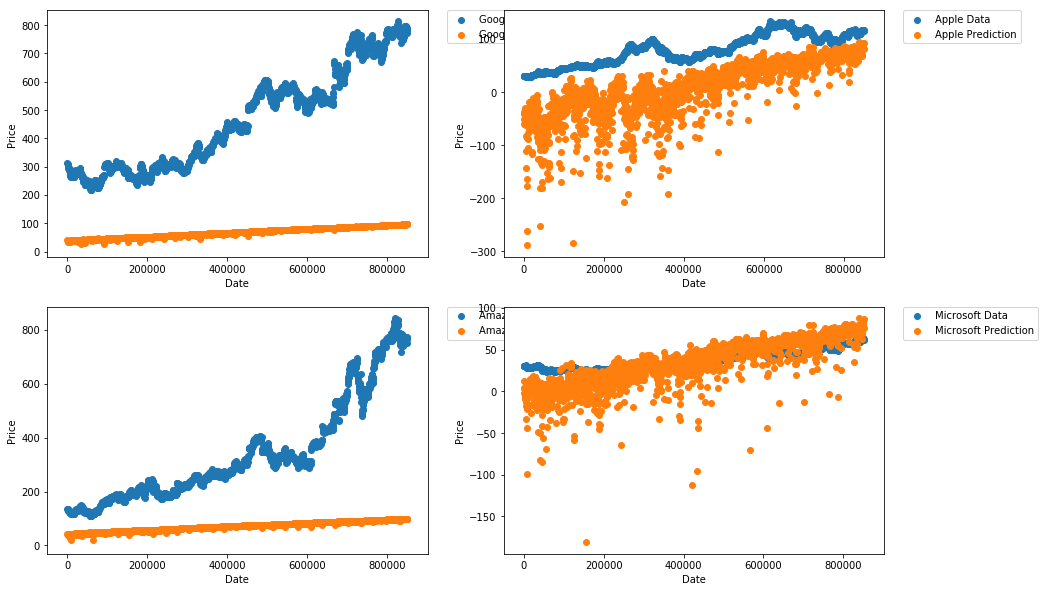

In [28]:
df = pd.read_csv('prices.csv')
df = df.sample(frac=1)
df['symbol'] = df['symbol'].astype('category')
df['int_symbol'] = df['symbol'].cat.codes
split = int(round(len(df.index)*0.8))
train = df[0:split]; test = df[split+1:]
train_price = train["close"]; train_feat = np.column_stack((np.asarray(train['int_symbol']),np.asarray(train.index)))
train_feat = np.column_stack((train_feat,np.asarray(train.volume)))
test_price = test["close"]; test_feat = np.column_stack((np.asarray(test['int_symbol']),np.asarray(test.index)))
test_feat = np.column_stack((test_feat,np.asarray(test.volume)))
linear_mod = linear_model.LinearRegression()
linear_mod.fit(train_feat, train_price)
train['lin_reg'] = linear_mod.predict(train_feat)
test['lin_reg'] = linear_mod.predict(test_feat)
result = pd.concat([train,test])
Goog = result[result.symbol == "GOOG"]
Apple = result[result.symbol == "AAPL"]
Amaz = result[result.symbol == "AMZN"]
Micro = result[result.symbol == "MSFT"]
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(2, 2, 1)
plt.scatter(Goog.index, Goog["close"], label= 'Google Data')
plt.scatter(Goog.index, Goog["lin_reg"], label= 'Google Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.add_subplot(2, 2, 2)
plt.scatter(Apple.index, Apple["close"], label= 'Apple Data')
plt.scatter(Apple.index, Apple["lin_reg"], label= 'Apple Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.add_subplot(2, 2, 3)
plt.scatter(Amaz.index, Amaz["close"], label= 'Amazon Data')
plt.scatter(Amaz.index, Amaz["lin_reg"], label= 'Amazon Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.add_subplot(2, 2,4)
plt.scatter(Micro.index, Micro["close"], label= 'Microsoft Data')
plt.scatter(Micro.index, Micro["lin_reg"], label= 'Microsoft Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

C:\Program Files\Python35\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Program Files\Python35\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


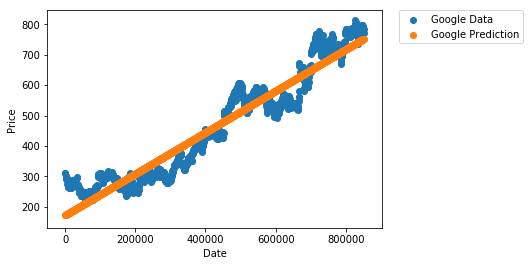

In [29]:
df = pd.read_csv('prices.csv')
df = df[df.symbol=="GOOG"]
df = df.sample(frac=1)
df['symbol'] = df['symbol'].astype('category')
df['int_symbol'] = df['symbol'].cat.codes
split = int(round(len(df.index)*0.8))
train = df[0:split]; test = df[split+1:]
train_price = train["close"]; train_feat = np.column_stack((np.asarray(train['int_symbol']),np.asarray(train.index)))
test_price = test["close"]; test_feat = np.column_stack((np.asarray(test['int_symbol']),np.asarray(test.index)))
linear_mod = linear_model.LinearRegression()
linear_mod.fit(train_feat, train_price)
train['lin_reg'] = linear_mod.predict(train_feat)
test['lin_reg'] = linear_mod.predict(test_feat)
result = pd.concat([train,test])
plt.scatter(result.index, result["close"], label= 'Google Data')
plt.scatter(result.index, result["lin_reg"], label= 'Google Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### 2.3 Support Vector Models

C:\Program Files\Python35\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Program Files\Python35\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


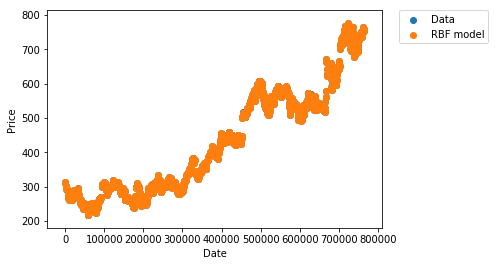

In [13]:
from sklearn.svm import SVR
df = pd.read_csv('prices.csv')
df = df[df.symbol == "GOOG"]
#df = df.sample(frac=1)
df['symbol'] = df['symbol'].astype('category')
df['int_symbol'] = df['symbol'].cat.codes
split = int(round(len(df.index)*0.9))
train = df[0:split]; test = df[split+1:]
train_price = train["close"]; train_feat = np.column_stack((np.asarray(train['int_symbol']),np.asarray(train.index)))
test_price = test["close"]; test_feat = np.column_stack((np.asarray(test['int_symbol']),np.asarray(test.index)))
svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
svr_rbf.fit(train_feat, train_price)
train['svr_rbf'] = svr_rbf.predict(train_feat)
test['svr_rbf'] = svr_rbf.predict(test_feat)
result = pd.concat([train,test])
result = train
plt.scatter(result.index, result.close, label= 'Data')
plt.scatter(result.index,result['svr_rbf'] ,label= 'RBF model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### 2.4 Deep Stock

In [ ]:
import time
import math
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import pandas as pd
import sklearn.preprocessing as prep
df = pd.read_csv('prices.csv')
df.head()
def standard_scaler(X_train, X_test):
    train_samples, train_nx, train_ny = X_train.shape
    test_samples, test_nx, test_ny = X_test.shape
    
    X_train = X_train.reshape((train_samples, train_nx * train_ny))
    X_test = X_test.reshape((test_samples, test_nx * test_ny))
    
    preprocessor = prep.StandardScaler().fit(X_train)
    X_train = preprocessor.transform(X_train)
    X_test = preprocessor.transform(X_test)
    
    X_train = X_train.reshape((train_samples, train_nx, train_ny))
    X_test = X_test.reshape((test_samples, test_nx, test_ny))
    
    return X_train, X_test
def preprocess_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.as_matrix()
    
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index : index + sequence_length])
        
    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[: int(row), :]
    
    train, result = standard_scaler(train, result)
    
    X_train = train[:, : -1]
    y_train = train[:, -1][: ,-1]
    X_test = result[int(row) :, : -1]
    y_test = result[int(row) :, -1][ : ,-1]

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], amount_of_features))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], amount_of_features))  

    return [X_train, y_train, X_test, y_test]
def build_model(layers):
    model = Sequential()

    # By setting return_sequences to True we are able to stack another LSTM layer
    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.4))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.3))

    model.add(Dense(
        output_dim=layers[3]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop", metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model
window = 20
X_train, y_train, X_test, y_test = preprocess_data(df[:: -1], window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)
model = build_model([X_train.shape[2], window, 100, 1])

model.fit(
    X_train,
    y_train,
    batch_size=768,
    nb_epoch=300,
    validation_split=0.1,
    verbose=0)
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
diff = []
ratio = []
pred = model.predict(X_test)
for u in range(len(y_test)):
    pr = pred[u][0]
    ratio.append((y_test[u] / pr) - 1)
    diff.append(abs(y_test[u] - pr))
    
import matplotlib.pyplot as plt2

plt2.plot(pred, color='red', label='Prediction')
plt2.plot(y_test, color='blue', label='Ground Truth')
plt2.legend(loc='upper left')
plt2.show()

## 3. References

* [1] https://www.kaggle.com/dgawlik/nyse
* [2] https://github.com/chaitjo/regression-stock-prediction
* [3] https://github.com/BenjiKCF/Neural-Network-with-Financial-Time-Series-Data